<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearning/blob/master/Linear_Regression/Class4/Linear_Regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

- **Recap**

- **Importance of train test split**

- **Feature importance and interpretation**

- **Importance of standardization**

- **Min max scaler**

- **Case study: Predict mileage of car**
    - Loading data
    - One Hot encoding
    - Create dummy variables
    - Handling missing values
    - Data splitting
    - Fit linear model

- **Impact of outliers**

- **Assumptions in Linear Regression**
    - Assumption of Linearity

    - Features are not multi-collinear
        - VIF

    - Errors are normally distributed

    - Error terms must be independent

    - Homoscedasticity: Error has constant variance

- Polynomial regression
- Occam's Razor
- Bias variance Tradeoff
- Regularization


## What did we learn in last lecture ?

- We looked at how we define the functions
- Understood the z score
- Learnt the importance of standardization (Min - max Scaler)
- We also digged into code and understood how to create LinearRegression object.
- We understood what does `fit` function do.
- We also understood about errors
- At last, we also discussed why $R^2$ is important.


## When working on ML model, what all things to keep in mind ?

Let's say we have a dataset (say 10 datapoints)



<center><img src="https://drive.google.com/uc?id=1EYn4tKAihZINuWjD0GttzUQ2EoL4cvbV" width="800" height="400">

### Importance of train test split

#### Recall that we talked about train and test data?

When we build a model, we don't take whole data but a portion of data and term it as training set.

We use the remaining set as test data.

For building model,
- we can choose first 8 rows/ datapoints as training set and
- remaining 2 rows will be available as test data.



<center><img src="https://drive.google.com/uc?id=1xnIXcm2Q8ELuDH7lYigrCU7CVkm7jbRv" width="700">


In Real world,
when we do this train test split,
- It is not mandatory to take training data in any order.

When we have 10 records,
- and we are dividing it into 8 and 2.
- It means 80% - 20%

Now, these 2 test datapoints can be any two points.
- It need not be last two datapoints.



<center><img src="https://drive.google.com/uc?id=1zCojEI12Zx-3nAzD6pm6Iby1eFRCMwB-" width="700">


Notice that,
- In this case, we also have 80-20 split but in random way.

Generally,
- when we split data in train and test, it has to be complete random.
- i.e. there's no pattern in datapoints selection for train/test.

#### Question: What should be a good split ratio ?

Generally,

- You'll find 80-20 split ratio.

But, if you have good enough data (say 10k datapoint)
- then we use 70-30 split i.e.
    - Built model with 70% of datapoint and
    - use rest 30% for test.

It depends on how much data you have with you.
- If you don't have sufficient amount of data with you, then
    - 80-20 split can be preffered.

- Else, 70-30 split can be chosen.

We have a function/API which helps us in splitting the data and we'll explore it in today's lecture

#### Question: What do we do after splitting the data ?

- Now, we have the train data.

- From train data, we build a mathematical function (say, model)


#### Question: What do we do with this model ?

- Using this trained model,
    - We run this model on test data
    - We use the `predict` function on test data and get the predictions

After getting the predictions,
- we calculate the $R^2$ on Test data.

If this $R^2$ comes out to be good, then we can say this model is a relaible model.
- Because it's no use if we do the predictions on train data and calculate the $R^2$ (done in previous lecture)

In previous lecture, we used train data to build the model and we were using same to test the model.
- So, we'll definately get a good $R^2$ on it.



<center><img src="https://drive.google.com/uc?id=1qaO3Fpl-oH8QP5Lumt23uwuVXA_jZbZT" width="700">


To summarize:
- On train data, we'll build the model
- On test data, we'll test our model performance.

### Feature importance and Interpretation

Say, we are predicting sales of a product (say, Scaler DSML course ) based on TV ads spending (column A) and Social Media ads spending (column B).

#### Question: What will be the regression equation for this ?

Ans: $w_0 + w_1 A + w_2 B $= $ŷ$


<center><img src="https://drive.google.com/uc?id=1SuapiRNKE8fz7IzhF7S1GRPpftEdxFJN" width="700">



Let's say, the coef. for our model are as follows:

<br>

**Equation: $ŷ$ = $3 + 2*TV + 3*SM$**

<br>

#### Question: Wha does this model tells us ?

It tells us that
- Say, we kept our TV budget as constant and increased our SM ads budget by 1 unit, it'll increase/impact our sales by 3 units.

- If we keep our SM ads budget as constand and icrease the TV ads budget by 1 unit, it'll increase sales by 2 units

#### What does this means?

- It means higher the value coef, better the value.




Now, suppose, our model is:

$ŷ$ = $3 + 2*TV - 3*SM$

#### Question: What does this mean?

It means social media is impact our sales negatively.
- For example:  We put up an ad which was percieved wrongfully and boycott trends start.


This is how we interpret the coef.

### Importance of standardization

We had 2 features i.e. TV budget and SM budget.

Now,
- values of TV budget are written in exact figures whereas

- SM budget values have been factorized and are written for a million.
    - For example: when the value of SM is 3, it means 3 million.

When we built the model, the equation will be:

$w_0 + w_1*TV - w_2*SM$ = sales


<center><img src="https://drive.google.com/uc?id=13Rq1i6aYW_dFtYT3-KhKig7ChEFLGFrm" width="700">



The values of TV budget are large whereas
- the values of SM budget are at max of 2 digit (due to fix of scale to million)

- While calculating the coef, it'll drive model to pick small value for $w_1$ and increase the value of $w_2$ to balance out things.

Here, variation in **units** are going to create problem for us.


#### Question: How can we resolve this issue ?

=> Standardization / Normalization

We can do this using two methods:
- If we use z-score here, we'll bring everything to same units

- Another technique is min-max scaler.



### Min max scaler

It brings all the values in between the range of **0 - 1**

#### Question: What two values do we need to convert values to 0 - 1 range ?

Ans:

Min max scaling = $\frac{x_i - min}{max - min}$

$x_i$ ranges from (min, max)

- If we put $x_i$ = min, then

=> $\frac{min - min}{max - min}$ = 0

- If we put $x_i$ = max , then

=> $\frac{max - min}{max - min}$ = 1









<center><img src="https://drive.google.com/uc?id=1XuLccB-9YirjjWalxskDVBKi1f1FE32q" width="600">


#### Question: Based on this, what will be the issue with Min max scaling ?

Outlier can impact min max scaler.

- As outlier value will be treated as max value,
    - while scaling, it'll squeeze rest of the values to a very small range say 0 - 0.2
    - Most of the values will sit near min value.

## Code walkthrough

### Predict mileage using given attributes.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


### Load and review data

In [ ]:
!gdown 1RN3Fncv6sypLDHRjYDlQlKC_ATXC5yB6

Downloading...
From: https://drive.google.com/uc?id=1RN3Fncv6sypLDHRjYDlQlKC_ATXC5yB6
To: /content/auto-mpg.csv
100% 18.1k/18.1k [00:00<00:00, 23.5MB/s]


In [ ]:
cData = pd.read_csv("auto-mpg.csv")
cData.shape

(398, 9)

In [ ]:
# 8 variables:
#
# MPG (miles per gallon),
# cylinders,
# engine displacement (cu. inches),
# horsepower,
# vehicle weight (lbs.),
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and
# origin of car (1. American, 2. European,3. Asian).
#
# Also provided are the car labels (types)
# Missing data values are marked by series of question marks.


cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Here, origin can have 3 distinct values:
- 1 => American
- 2 => Eurpoean
- 3 => Asian

#### Question: Do we need car name to predict the mileage ?

Ans: No. So, let's drop the carname.

Let's also replace the origin value with their corresponding location

In [ ]:
#dropping/ignoring car_name
cData = cData.drop('car name', axis=1)
# Also replacing the categorical var with actual values
cData['origin'] = cData['origin'].replace({1: 'American', 2: 'europe', 3: 'asia'})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,American
1,15.0,8,350.0,165,3693,11.5,70,American
2,18.0,8,318.0,150,3436,11.0,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,17.0,8,302.0,140,3449,10.5,70,American


Recall that we can't use any categorical data into our regression equation.
- We need to have our data in numbers

#### How can we convert categorical to numerical data ?

There are various techniques for encoding/ converting categorical to numerical data.

In this example, we'll use a simple technique called **One Hot Encoding**

### One Hot encoding

Say, we have two columns
- Age
- Origin


<center><img src="https://drive.google.com/uc?id=1P8vzCaXz3V7pQxSYX_y-d7wPVQ1i0wmW" width="600">



Let's say, we assigned
- America = 1
- India = 2
- Australia = 3

#### Question: Will this work ?

There's an issue with this approach.

- Since, we are assigning 3 to Australia
    - It means we are giving more weightage to it.

Our equation is $y = mx + c$

- When we put x = 3 in it, it means we are giving more weightage to it; which isn't fair.

We solve this using **One Hot Encoding**

- All the unqiue values of origin will be come separate column
    - i.e. We'll have a separate column for India, America and Australia
    


<center><img src="https://drive.google.com/uc?id=1aF6HliqbJLHvlkUstNdTnhPDZE73bVXR" width="600">


In original column, we have origin as America for first row.

- So, we'll populate the America column as 1. In rest of the column, we'll put 0.

Similarly,
- we have India as origin for second row.

So, we'll put India as 1 and rest two as zero


<center><img src="https://drive.google.com/uc?id=173G4IEptAopiVjz8jvuufX39cPNpXOHg" width="600">


Using this technique, we are not giving any advantage to specific value.

#### Question: Say, you know the values for America and India column. Can you figure out values for Australia column ?

Ans: Yes. If we know values for two out of 3 columns, we can automatically find the value for 3rd column

- This makes one of the column as redundant.
- and we can remove one of the column

So, we'll simply remove one column (Australia)

Let's apply it using code

### Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [ ]:
cData = pd.get_dummies(cData, columns=['origin'])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


### Dealing with Missing Values

In [ ]:
#A quick summary of the data columns
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_American,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


#### Datatypes of column

In [ ]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
cData.dtypes

mpg                float64
cylinders            int64
displacement       float64
horsepower          object
weight               int64
acceleration       float64
model year           int64
origin_American      uint8
origin_asia          uint8
origin_europe        uint8
dtype: object

Notice that
- dtype of horsepower is `object`

In [ ]:
# isdigit()? on 'horsepower'
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


we have some missing values in `horsepower` columns.

We'll convert it to NaNs

In [ ]:
# Missing values have a'?''
# Replace missing values with NaN
cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_American,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


### Handling missing values

There are various ways to handle missing values.
- Drop the rows
- replace missing values with median values etc.

Out of 398 rows, 6 have NAN in the hp column.

We could drop those 6 rows - which might not be a good idea under all situations

Instead of dropping the rows, lets replace the missing values with median value.



In [ ]:
cData.median()

mpg                  23.0
cylinders             4.0
displacement        148.5
horsepower           93.5
weight             2803.5
acceleration         15.5
model year           76.0
origin_American       1.0
origin_asia           0.0
origin_europe         0.0
dtype: float64

In [ ]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['horsepower'] = cData['horsepower'].astype('float64')  # converting the hp column from object / string type to float


### Split Data

Before splitting, we'll also drop one of Dummy column (Europe) as it is redundant

In [ ]:
# lets build our linear model
# independant variables
X = cData.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = cData[['mpg']]

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Fit Linear Model

#### Question: What should we pass in fit function ?

We'll pass `X_train, y_train` to fit function

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Question: How can we get the coef./ weights ?

Ans: After training the model, we can access the coef. using `.coef_` property

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.39480796616482383
The coefficient for displacement is 0.028945510765487188
The coefficient for horsepower is -0.02175220772354677
The coefficient for weight is -0.007352032065147351
The coefficient for acceleration is 0.061919366007618756
The coefficient for model year is 0.836933891764499
The coefficient for origin_American is -3.001283000918514
The coefficient for origin_asia is -0.6060179643247368


In [ ]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372053


#### Question: How can we get $R^2$ score ?

Ans: Using `.score()`

#### Training $R^2$ score

In [ ]:
regression_model.score(X_train, y_train)

0.814102550161056

#### Test $R^2$ score

In [ ]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


## Impact of outliers

### Question: Will outliers impact the model (regression line) or not ?

When outliers are not present, you get a good line of best fit.

- When there is an outlier present, the line of best fit or regression line will get pulled towards it.

#### Why regression line is pulled towards outlier?
- The equation is such that it'll try to pull whereever the outlier is sitting so as to reduce the distance.
- The closer the regression line is to outlier, less the error.

Make sure to remove the outliers before you start working on dataset.

<center><img src="https://drive.google.com/uc?id=1x_fXvkx1Ppla-CzQBAQniXtrAe6Z83mV" width="700" > </center>



- Click on the link to try yourself: https://observablehq.com/@yizhe-ang/interactive-visualization-of-linear-regression


## Assumptions in Linear Regression

### 1. Assumption of Linearity

- Relation between the any independent and dependent variables must be linear.

- if your relationships are not linear, we do some kind of fix to handle the non linear relationship using polynomial regression (will see later)

<center><img src="https://drive.google.com/uc?id=1ORTVQpFLQ_a10kxokjXxGixc_VC-irZ2" width="800" height="400"> </center>


### 2. Features are not multi-collinear


#### What does multi-collinearity mean ?

Let's say you have 4 independent features $x_1, x_2, x_3, x_4$ and a dependent varaible $y$

<center><img src="https://drive.google.com/uc?id=1cJsbX-FoTn3ZS45W6Y5sB_PegUL2oKwA" width="600"> </center>


We want the relation between independent and dependent variable as : $y$ = $f(x)$

<center><img src="https://drive.google.com/uc?id=1X_2tVGIiqOgKGC-rJyYyl3ScsFKopsd3" width="600"> </center>

#### Question: But, should there be a dependency among the independent variables ?

Ans: No

This could be a problem if there's a dependency between two or amoung the independent variables

The dependency could look something like:


<center><img src="https://drive.google.com/uc?id=1WPgirBYuV3__sZunT28yY10nEx17Ro5V" width="600"> </center>

The above equation is basically saying:
- the values of $x_2$ are dependent on $x_3$ and $x_4$.

and this is called as **Multicollinearity**.

#### How to fix the Multicollinearity

We fix the Multicollinearity using **VIF** (Variance Inflation Factor)

It fixes the multicollinearity using a very smart way.

Let's say we have 4 columns $x_1, x_2, x_3, x_4$

- First, it'll assume $x_1$ is dependent columns and $x_2, x_3, x_4$ are indepedent columns
- Now, it'll create/build a model on it and checks the $R^2$ value


<center><img src="https://drive.google.com/uc?id=1YtMOzCkM1ar_niASvSf9u6jHXqxbGwpu" width="600"> </center>


#### Question: If the $R^2$ value is high, does this mean $x_1$ have some dependency coming among these columns ?

Ans: Yes



Next,

We'll again build a model with $x_2$ as dependent variable and $x_1, x_3, x_4$ as independent variables

- We'll check the $R^2$ value for it

- And get to know whether the $x_2$ is dependent on these variable or not based on the value of $R^2$



This way,
- it internally keeps on computing $R^2$ for all the columns across and looks for columns where $R^2$ is higher
- If the $R^2$ is higher, then those are columns which are creating high dependency

#### Formula for VIF


<center><img src="https://drive.google.com/uc?id=1QPkLmPj9I3X9KR4eujMh2gEUfhVJfy3A" width="600"> </center>



#### Rule of thumb for VIF

- It can be infered that if ${VIF}⇑$, that feature is more collinear
- Rule of thumb:
  - if $VIF_j > 10$ : Very High multiCollinearity
  - if 5 <= $VIF_j$ < 10 : High multiCollinearity
  - $VIF_j$ < 5 : we can use that feature

### 3. Errors are normally distributed

If you get all your errors and plot them up
- you'll notice that it'll create a bell shaped curve
- i.e. errors are normally distributed

The third assumption of Linear Regression is that the residuals should follow a normal distribution.

<center><img src="https://drive.google.com/uc?id=1qoxixvI4nXmBB0JM7S0BfUDbyPXcO8Hs" width="800" height="400"> </center>

- If you plot the error distribution and it is not normal, then it means there are outliers present in data.

### 4. Error terms must be independent

- If we plot a scatter plot between the target variable and the error term, then
- there shouldn't exist a pattern in the error

Usually occurs in time series data.

- We'll talk about it in detail once we learn time series

<center><img src="https://drive.google.com/uc?id=1YvXocfNA98zLjvnNf4zHF_5BXecBrbVE" width="800" height="400"> </center>

### 5. Homoscedasticity: Error has constant variance.

Homoscedasticity means to be of “The same Variance”, the error terms will be the same and of very little variance.

<center><img src="https://drive.google.com/uc?id=1PN6TBxgqWDT0l-16RVXcFI2cwAsSVhdT" width="800" height="400"> </center>

-  A scatterplot of residuals versus predicted values is good way to check for homoscedasticity.
- You should get a graph like the left graph above.






## Polynomial Regression

Say you are predicting sales of a product based on month data and the data looks like this:

<center><img src="https://drive.google.com/uc?id=1eKPDUxN15qZ-NshuNdr4zHZ6TCBWoFsu" width="600"> </center>


#### Question: Will a regression line will be properly fit to the data ?

<center><img src="https://drive.google.com/uc?id=1XuIHbkv55nBU4p5a-WbFd_APSROEX0Uy" width="600"> </center>

Ans: No. It'll not work

The equation for given curve will look somewhat like : $30 \sqrt{m} . cos(0.5m) + 5.83m + 78$

Let's take another example:

Say, you are given data of US Energy consumption vs year.

<center><img src="https://drive.google.com/uc?id=1yurzdXGI-mek7Fqt4buOyRqlkLnFveO9" width="600"> </center>


#### Question: Can you fit a regression line to it ?

No.

The equation of energy consumption may look like

$c (consumption)$ = $A + By + Dy^2 + Ey^3$

- where y = year
- A, B, D and E are constants/coef.

#### Conclusion:

- As we can see, sometimes there can be variation in data
- Data may not look linear always

#### Recall the first assumption of Linear Regression?

There should be Linear relation between dependent and independent feature.

- But that assumption is being voilated in this case.

#### What should be do ?

We take the help of polynomial regression in these cases.

#### Question: Suppose your data is following the following pattern. What plot is this ?

<center><img src="https://drive.google.com/uc?id=12l_uuStc1helP7l2cd8ZQN1d_kWgpd8_" width="600"> </center>



Ans: $e^x$

OR the data may look like this:

<center><img src="https://drive.google.com/uc?id=1vgR0WkgGsbJXgcipwT1wPOKnwzMCygI_" width="600"> </center>




Let's take another example:

Say, you are given the following data (height, weight, gender, age) and you've to predict the Blood Pressure (BP)

<center><img src="https://drive.google.com/uc?id=1YsvlPWXbpOBjS6C0m0qH7ZnDhXHNbEYU" width="600"> </center>



Now, there's another aspect which may be important for calculating BP: BMI (Body Mass index)
- BMI will be a non-linear feature

<center><img src="https://drive.google.com/uc?id=1YwBCcZ5X47jBPHjMPhc4R_ShE2zaTW-G" width="600"> </center>

Let's say we have multiple data points with raw attributes($x_1, x_2, x_3, x_4 ... x_d$) and response variable ($y$)


<center><img src="https://drive.google.com/uc?id=1VN28ybevG3wHYRYqJibvd4ahjqkVNwvq" width="600"> </center>

Now, we create transformed features out of it (denoted using $ϕ_i(x)$)

<center><img src="https://drive.google.com/uc?id=1FY0XQfhfVRKA4RpTE4v7X6vZeXPhJ8ci" width="600"> </center>



#### Question: What is the regression equation ?

Ans:

<center><img src="https://drive.google.com/uc?id=180PQ2lFDkc05BCpnW-i2lcJM3fusq1B6" width="600"> </center>


But since we are using transformed features, the equation would look like:

<center><img src="https://drive.google.com/uc?id=103miYB1odJSNp47Rp5tm11EAkwY_Srou" width="600"> </center>



### Code walkthrough

#### US electricity consumption based on year

#### Importing libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

#### Loading data

In [ ]:
!gdown 12wjTgfPAXwB7VNMvxm0LRBG8pjxG_ZqQ

Downloading...
From: https://drive.google.com/uc?id=12wjTgfPAXwB7VNMvxm0LRBG8pjxG_ZqQ
To: /content/total-electricity-consumption-us.csv
100% 680/680 [00:00<00:00, 2.63MB/s]


In [ ]:
#fetching data
elec_cons = pd.read_csv("total-electricity-consumption-us.csv",  sep = ',', header= 0 )
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


The dataset contains two variables - year and electricity consumption.

#### Total number of observations

In [ ]:
# number of observations: 51
elec_cons.shape

(51, 2)

#### Are there any missing values?

In [ ]:
# checking NA
# there are no missing values in the dataset
elec_cons.isnull().values.any()

False

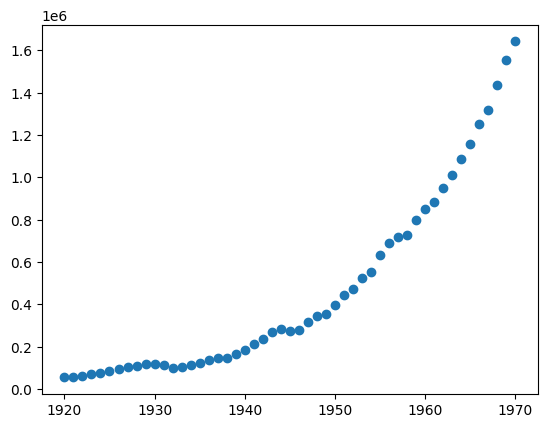

In [ ]:
plt.scatter(x=elec_cons['Year'], y= elec_cons['Consumption'])

#### Splitting in train test

Since the number of datapoints are less, we are splitting it based on index for this exercise



In [ ]:
size = len(elec_cons.index)
index = range(0, size, 5)

train = elec_cons[~elec_cons.index.isin(index)]
test = elec_cons[elec_cons.index.isin(index)]


In [ ]:
print(len(train))
print(len(test))

40
11


#### Reshaping

In [ ]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

#### Fitting model

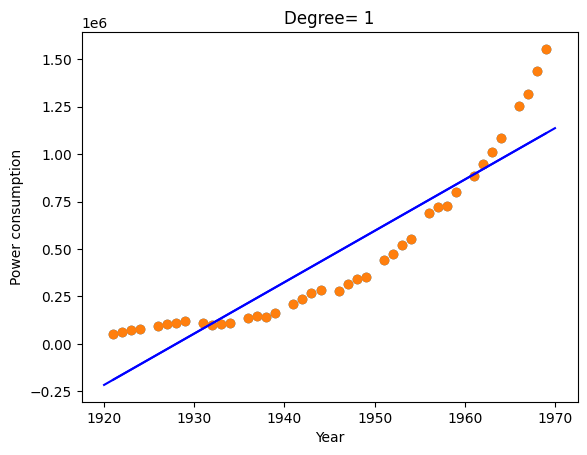

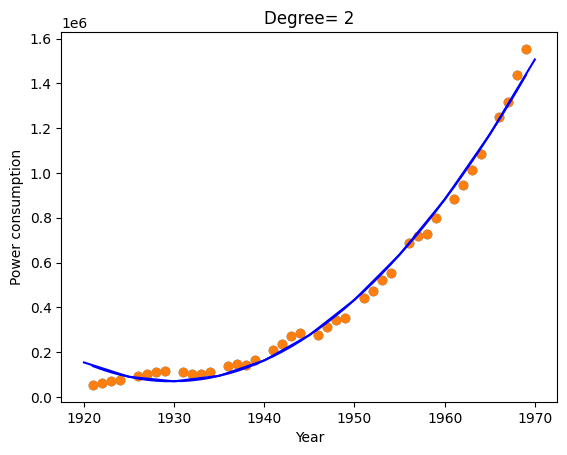

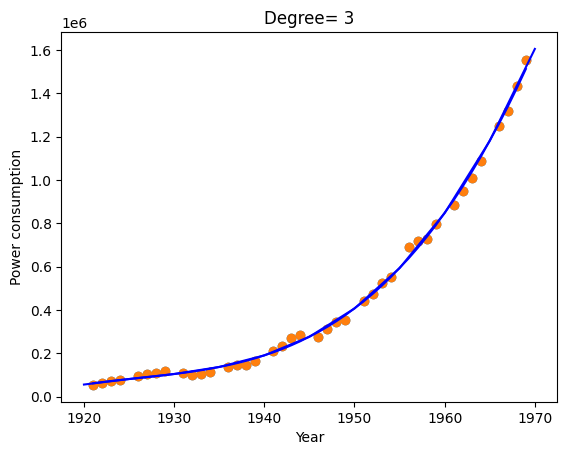

In [ ]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other,
# in this case, the objects are PolynomialFeatures() and LinearRegression()

r2_train = []
r2_test = []
degrees = [1, 2, 3]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))

    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))

# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))

    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train, color="blue")

    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred, color="blue")

    plt.show()

In [ ]:
# respective test r-squared scores of predictions
for i in degrees:
    print(f'For degree {i}, train R2 is {r2_train[i-1]} and test R2 is {r2_test[i-1]}')

For degree 1, train R2 is 0.8423747402176137 and test R2 is 0.816517046382681
For degree 2, train R2 is 0.9908896744553399 and test R2 is 0.9876080502675171
For degree 3, train R2 is 0.9979789881922152 and test R2 is 0.9984897454348863


Note:
- Always check your $R^2$ on test data.

It may be possible that model is performing good on train data but not on test day (also called overfitting)

So, you should always **Generalize**

- whatever you train a model, make sure you are testing it on unseen data.
- and model performance on train and test should be similar
- i.e. model is generalizing well on train as well as test data.


## Occam's Razor

Say, you've two models.

**First model:** $y = ax_1 + c$

**Second model:** $y = ax_1^3 + bx_1^2 + cx_1 + d$

**Performance of first model**: 74%

**Performance of second model**: 78%

<center><img src="https://drive.google.com/uc?id=1RRrX-K7PZ5-lFw9evlc1V5npq3VjwYJQ" width="600"> </center>


#### Question: Which model will you pick?


Occam's razor says that "pick the simplest model"

So, we'll pick the **first model**.

- Even if the other model (second one ) is having slight improvement in terms of performance,
    - we would like to avoid putting complex model into production.
    - as they add less business value

Generally, the idea is to keep things as simple as one can.



#### Question: How do we decide at what degree should we stop to avoid overfitting?

Ans:

For the train data,
- as you include more degrees to your features, you'll calculate $R^2$ for it

Similarly, you'll calculate $R^2$ for Test data.


Suppose, you are increasing polynomials one by one and
- there's an increase in train performance

However, test performance didn't increase for second polynomial degree.

It is giving us an hint that the model is starting to overfit.

So, we keep a watch on test data
- it helps us understanding whether it is leading to overfitting.

<center><img src="https://drive.google.com/uc?id=1n9C2EgOY1tBFuvrKccuMeXA8XMYKcW-r" width="600"> </center>


Now, let's talk about overfitting and underfitting in detail

## Bias Variance Tradeoff

Suppose you've data which looks like following:

Here,
- <font color = 'green'> Green curve</font> is overfitting as it is exactly matching the pattern of data
- <font color ='blue'>Blue line</font> is underfit as it's not even trying to get near the pattern of data. Hence, the errors will be high.

<center><img src="https://drive.google.com/uc?id=13H-0iQZRGew1uAuP2cq2MCiMMzNrJFfk" width="600"> </center>


### Overfitting Scenario

Let's try to understand underfit overfit from a simple example:

Think of a student who has to appear for an exam.
- For preparation, s/he mugged up all the questions from text book.

In ML context, his $R^2$ over train data will be high (assume student to be model)

**But, what'll be his/her performance on the exam ?**

**How will s/he do in the exam if exam doesn't consist of same question as textbook but a variety of those question?**

- Hence, performance or $R^2$ on test data will be low.

<center><img src="https://drive.google.com/uc?id=1tCy10X_OofLJAixzxPglEs78RKbzVIIs" width="600"> </center>





### Underfitting Scenario

Similarly, **in case of undefitting**,

- Suppose, this time student just only went through topics name and nothing else.
- Obviously, preparation in this case is weak
- i.e. performance on train data ($R^2$) is low

and henceforth, performance on test data will be low as well.

<center><img src="https://drive.google.com/uc?id=18k08jdVhO1sW7wxlb7bqLk63_uKw4FKp" width="600"> </center>


$ $
To summarize:
- Whenever we have an underfitting scenario,
    - both train and test $R^2$ are low

- In overfitting scenario,
    - train $R^2$ is high
    - However, test $R^2$ is low

Now, we have to find the middle ground.

### What will be perfect model ?

Perfect model will lie somewhere between these 2 scenarios of overfitting and underfitting

- There will be error but these will be reasonable for both train and test
- There'll a good balance across both train and test.

### How do we do trade off between underfitting overfitting, mathematically?

Consider the model function  

where $y_i = w_0 + w_1x_{i_1}^1 + w_2x_{i_1}^2 + w_3x_{i_1}^3 + w_4x_{i_1}^4$

- $f_1$ or $x_{i_1}$ is original feature
- Rest of features are transformed features (power of $f_1$)



<center><img src="https://drive.google.com/uc?id=1tGCNR6xz7OWUFWbwYMxsDqjLyQgu4Tum" width="600"> </center>


We have 3 cases
- Case 1 (Model M1): $w_1, w_2, w_3, w_4 \neq 0 $
- Case 2 (Model M2): $w_1 , w_2 \neq 0$ and $w_3 = w_4 = 0$
- Case 3 (Model M3): $w_2 = w_3 = w_4 = 0$ and $w_1 \neq 0$


#### Question: Which of these is more likely to be overfit model?
Model M1.

Here, Critical concept is **weights**

- If weights are non zero ($w_1, w_2, w_3, w_4 \neq 0 $), it means we are giving some importance to $f_1, f_1^2, f_1^3 and  f_1^4$.

- Chances of having overfit model is more

#### Question: Similarly, which of the the above model is underfitting ?
Ans: Model M3


**If weights on higher order polynomial $\neq 0$, more chances of overfit**



<center><img src="https://drive.google.com/uc?id=1wObfpjDAxXg_dGSlfGlLZuwY9OP3eidV" width="600"> </center>


### Relating with Bias Variance

  <center><img src="https://drive.google.com/uc?id=13noWSwF-46etriCuszaofzTKLeLg-k8j" width="600"> </center>

Let's try to understand with target shooting example:

**High bias is equivalent to aiming in the wrong place.**

**High variance is equivalent to having an unsteady aim.**

This can lead to the following scenarios:

- Low bias, low variance: Aiming at the target and hitting it with good precision.
- Low bias, high variance: Aiming at the target, but not hitting it consistently.
- High bias, low variance: Aiming off the target, but being consistent.
- High bias, high variance: Aiming off the target and being inconsistent.

### Plotting $R^2$ for train test data

When we plot the $R^2$ for train and test vs the polynomial degreee used in model

- For train data, as the polynomial degree increases, the $R^2$ value increases and then stagnates.

- For test data, the value of $R^2$ will increase at first and then it'll fall off as polynomial degree is increase.


#### Question: Which side of the plot represents Overfit?

Ans: Right side as there's a high variane in train and test performance.
- Train $R^2$ is high and test $R^2$ is low.

Similarly, the leftmost portion of plot represents underfitting
- Both train and test $R^2$ are low.

  <center><img src="https://drive.google.com/uc?id=1XisXNFkhHhSQXkFy63tp8bov3mnBfCTJ" width="600"> </center>


### Example of various model scenarios

  <center><img src="https://drive.google.com/uc?id=1YSgIrQxerHmgz6voT9DMqFNyaMlUbTgl" width="900"> </center>





- Underfitting means that a model is too general, implying  high bias - low variance  (for example: fitting a line on quadratic data)

- while overfitting means that a model is too specific, implying  low bias - high variance. (for example: fitting higher order polynomial on quadratic data)

When training a model, it is important to balance these two. Since you can’t realistically avoid bias and variance altogether, this is called the bias-variance tradeoff.

## Regularization

#### Question: What is our loss in linear regression ?

Ans: Squared loss i.e. $(y - ŷ)^2$

Here, $ŷ$ can be represented using $w_1x_1 + w_2x_2 + w_0$

And the loss becomes: $(y_i - (w_1x_1 + w_2x_2 + w_0))^2$

<center><img src="https://drive.google.com/uc?id=1lgYNJ97tx2J7zI_gAHhjvGDaC3E1o8YI" width="600"> </center>





Now, we want to minimize this loss as much as possible
- which means loss value should be small.

<br>

#### Question: When will the loss value be small ?

Loss will be small when the difference in actual $y_i$ and predicted $ŷ_i$ is minimal.

So, in order to make the difference minimal, the model tries to make $ŷ_i$ values larger.

<br>

#### Question: How can we increase the value of $ŷ$ ?

By making coef/ weights ($w_0, w_1, w_2$) larger.

<br>

In the process of minimizing error, the coef./ weights becomes very large value.
- and it becomes a challenge to handle.


#### How to handle it ?

The issue is large values of $w_i$. So, what if we add $w_i^2$ in our loss.



<center><img src="https://drive.google.com/uc?id=1iqPUPSw34QkjSuEfsRvCgDuCTNmiYvf9" width="700"> </center>


- When we try to increase values of coef./weights ($w_0, w_1, w_2$) in order to minimize the loss,
    - the second term ($w_i^2$) value increases
    - which increases the overall value of loss.

Basically, it is a kind of penalty.

### Example

Imagine you have a problem of **roof leakage** in your house.

#### How would you solve it ?

We have 3 remedies to stop the leakage
1. Bandage (Leakage -  1000 mL)
2. Shingles (Leakage - 10 mL)
3. Titanium (Leakage - 0 mL)

Say, every solution has a cost attached to it
1. Bandage (Cost - Rs 1)
2. Shingles (Cost - Rs 1000)
3. Titanium  (Cost - Rs 100,000)




 <center><img src="https://drive.google.com/uc?id=1qHrbCMMLQy0Kh_N9tVp4hkLvhqfYPuPc" width="900" height="500"> </center>



Observe the **tug of war** between Leakage and Budget.

- If you reduce the leakage with **titanium tiles, cost shoots up**
- If you use **bandage for leakage, cost is in control but leakage doesn't reduce**

  <center><img src="https://drive.google.com/uc?id=1XetX3-m2IGTpCy0oTa9GGsysnYnSZeHf" width="900" height="500"> </center>



#### What do we have to keep in mind for making decision?
- We want to minimize the leakage
- We want to minimize the budget as well.

i.e. $minimize ( Leakage + Budget)$

Here, consider
- Leakage as your **Loss(MSE)** and
- Budget as a new term called **Regularization**.

We want to $minimize \space (LOSS + REG.)$

  <center><img src="https://drive.google.com/uc?id=10Y-rZJqfoJ7L4ewWqCvEQ5ryVrCAZ7iF" width="900" height="500"> </center>




There can be case that when penalization becomes too high
- then all the coef. will be a small value.
- model will perform bad.

So, we need a control over regularization

#### But, how do we control the regularization ?


<img src="https://drive.google.com/uc?id=1xtgAh9yKfJmk-xvct8M0MF858USQwbAa">


- We introduce a term  𝜆  ( ≥0  ) which is multiplied with the regularization term ( $∑𝑤^2_j$ ).
- The optimization equation becomes

    **`minimize (Loss term + λ*Regularization term)`**


The regularization term is still going to add to the loss but we will control how much it'll add to it.


**Penalization should happen. But in a controlled way.**

#### How does value of lambda impact the model?





<img src="https://drive.google.com/uc?id=19GASMOjQAxCsZ4IlkF1RSUmZaVH4dWct">




  
    Optimization eq. = Loss term + λ Regularization term




- Case1: $λ = 0$
  - There will be no regularization term.
  - Model will overfit.

- Case2: $λ = ∞$ (large +ve value)
  - As value of lambda is large, the magnitude of squared loss term is negligible.
  - Weightage of regularization term will increase
  - It'll try to push all the $w_j$'s to zero.
  - Model will underfit.


Lambda, here is called **hyperparamter** of the model.

Hyperparamters helps us do overfit- underfit tradeoff. By changing the lambda, we can control the regularization and hence overfit and underfit of the model.

As lambda increase, we tend from overfitting to underfitting.

**Note:**
When we define a model,
- the weights of the model becomes our parameters
- And the rest of the variables such as Regularization parameter becomes our Hyperparameter


### Types of Regularization

#### L2 Regularization

Here, $w_j^2$ term is called as **L2 regularization**.
- We also call it as **Ridge Regression**


<center><img src="https://drive.google.com/uc?id=1It6kU7XDjfnDn3840eM24G90lMZVZBGi" width="600"> </center>






#### L1 Regularization

Instead of taking square of $w_i$, if we use the modulus i.e $|w_i|$
- then it is called as L1 regularization
- or **Lasso Regression**

Key highlight of Lasso Regression is:
- it is very good in giving sparse data
- i.e. whatever columns are irrelevent, it'll make its weights/ coef as 0.




<img src="https://drive.google.com/uc?id=17f_EQN_kyUasbon15ZqvFT2Yc__Wpn5c">


#### Elastic net regularization

- Combination of L1 and L2 regularization



<center>
<img src="https://drive.google.com/uc?id=19HL7EqvppRKE6h_KzJV9Le2AgVzrE67e" width =600> </center>


